# Weighted Least Squares

The idea of weighted least squares is that inherently, we care about some data points more than others, so we add a weighted matrix to the Ordinary least squares objective. The weighted least squares method can also be thought of as ordinary least squares with scaled feature and label data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
%matplotlib inline
from sklearn.datasets import make_regression

In [3]:
#weighted least squares solves for the same Ax=b problem, but with a weight term w on either side
import numpy as np
def WLS(A,b,w):
    #this code can be solved using a weighted A and b and just putting it through regular OLS, but for the sake of clarity, I 
    #will be writing it out in full
    weighted_A= np.matmul(np.sqrt(w),A)
    weighted_b= np.matmul(np.sqrt(w),b)
    lhs= np.matmul(weighted_A.T,weighted_A)
    rhs= np.matmul(weighted_A.T,weighted_b)
    x= np.matmul(np.linalg.inv(lhs),rhs)
    return x
#as we can observe from above, this is simply a OLS solution with weights on the A and b components, determine from a weight
#vector w, thatr can be used to amnipulate the data

In [4]:
#this method is an ordinary least square solvers, good for datasets with uniform data, no need for reguralization
def OLS(A,b):
    #solving the equation Ax=b
    if (matrix_rank(np.matmul(A.T,A)) != A.shape[1]):
        print("Matrix times its tranpoise is not full rank")
    lhs= np.matmul(A.T,A)
    rhs= np.matmul(A.T,b)
    x=np.matmul(np.linalg.inv(lhs),rhs)
    return x

In [5]:
x, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

# Note on Mean sqared error (MSE)
The MSE is a measure of the quality of an estimator. It calculates the mean squared difference across two quantities. The mean squared error is never negative, and the closer to zero, the better the estimate 

In [6]:
def MSE(y_true,y_predicted):
    return (1/len(y_true))*np.sum((np.subtract(y_true,y_predicted))**2)

Visualizing the data

Text(0.5,1,'Plotting the noisy data')

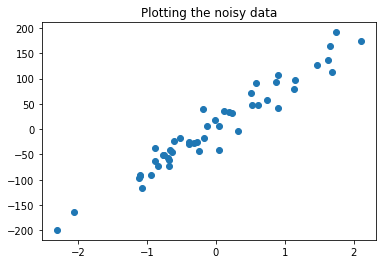

In [8]:
plt.scatter(x,y)
plt.title("Plotting the noisy data")

In [10]:
n= len(y)
vec=np.random.choice(np.arange(0,50,5),n)
w=np.diag(vec)

Text(0.5,1,'Comparision of estimation using WLS, and true data')

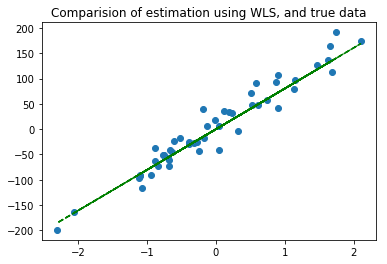

In [11]:
weights_predicted= WLS(x,y,w)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed',c='green')
plt.title("Comparision of estimation using WLS, and true data")

In [12]:
print("The mean squared error of the predicted labels using OLS is " + str(error))

The mean squared error of the predicted labels using OLS is 462.252146029209


Note that the value above is different that what we saw with our OLS case, however, to prove a claim we made earlier,
we are going to weight the data, then perform OLS and see what happens

Text(0.5,1,'Plotting the weighted noisy data')

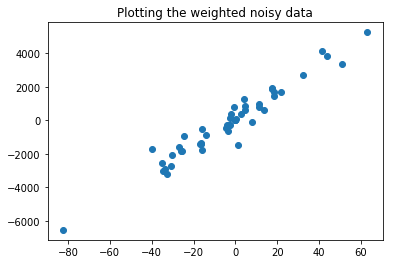

In [15]:
w_x= np.matmul(w,x)
w_y= np.matmul(w,y)
plt.scatter(w_x,w_y)
plt.title("Plotting the weighted noisy data")

Notice that the weighted noisy data looks very different, as it should.

Text(0.5,1,'Comparision of estimation using weighted OLS, and true data')

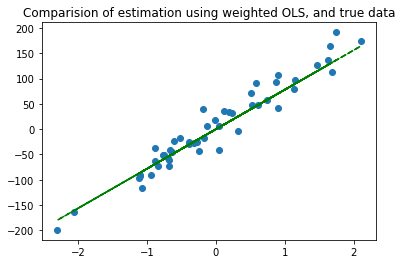

In [21]:
weights_predicted= OLS(w_x,w_y)
y_predicted= np.matmul(x,weights_predicted)
error= MSE(y,y_predicted)
plt.scatter(x,y)
plt.plot(x,y_predicted,linestyle='dashed', c='green')
plt.title("Comparision of estimation using weighted OLS, and true data")

In [22]:
print("The mean squared error of the predicted labels using OLS is " + str(error))

The mean squared error of the predicted labels using OLS is 485.8700671044348


Notice that our error above is much closer to the WLS case, this is because in the case of performing OLS upon a weighted data set,
you are simply performing WLS upon the original set (Note: the small difference in MSE is probably due to cutoffs at the sqrt fuction in the helper above)